In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fractions
import factor_analyzer
from math import gcd
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [2]:
survey_items_path = './dataset/self_observers_combined_w_ability_items_9.16.20.csv'
correct_items_path = './surveys/correct_responses.json'

In [3]:
with open(correct_items_path) as correct_items_file:
    correct_json = json.load(correct_items_file)
correct_dict = correct_json['correct_responses']
expected_stats = correct_json['expected_stats']
correct_dict

{'Q45': [6],
 'Q46': [3],
 'Q47': [4],
 'Q49': [4],
 'Q50': [5],
 'Q51': [2],
 'Q52': [2],
 'Q53': [4],
 'Q54': [4],
 'Q55': [4],
 'Q56': [4],
 'Q57': [6],
 'Q58': [3],
 'Q59': [2],
 'Q60': [6],
 'Q61': [7],
 'Q116.1': [1, 2],
 'Q117': [1, 2],
 'Q118.1': [1, 2],
 'Q119': [1, 2],
 'Q120.1': [1, 2],
 'Q121': [1, 2],
 'Q122.1': [1, 2],
 'Q123': [1, 2],
 'Q124': [1, 2],
 'Q126': [2, 4, 7],
 'Q127': [3, 6],
 'Q128': [1],
 'Q129': [2, 4, 8],
 'Q130': [1],
 'Q131': [3, 4, 9],
 'Q138': [2, 4, 9],
 'Q135': [1],
 'Q136': [1],
 'Q137': [1]}

In [4]:
survey_df = pd.read_csv(survey_items_path)
survey_df

,Unnamed: 0,ID,obsExtra,obsAgree,obsConsc,obsES,obsOpen,obsIntel,obsHire,obsQ1,...,Q126,Q127,Q128,Q129,Q130,Q131,Q138,Q135,Q136,Q137
0,1,an20te,3.833333,6.166667,5.000000,6.166667,5.500,6.000,4.333333,7.00,...,"9,3,6","1,6",1.0,"3,4,8",4.0,"1,6,7","2,4,8",1.0,1.0,1.0
1,2,an05ma,6.250000,5.000000,5.625000,3.500000,5.125,5.625,4.375000,5.00,...,"2,5,7","3,6",1.0,"3,6,8",1.0,"2,5,9","1,4,9",3.0,4.0,3.0
2,3,ey23el,1.500000,5.625000,5.000000,4.250000,4.125,5.125,3.125000,6.00,...,"9,3,6","3,6",3.0,"3,4,8",5.0,"2,5,9","1,4,8",1.0,5.0,1.0
3,4,an19ra,3.375000,5.000000,3.000000,5.125000,4.625,4.125,2.750000,6.75,...,"9,2,5","2,6",1.0,"2,5,8",5.0,"2,3,5","3,5,9",5.0,4.0,3.0
4,5,an14em,3.625000,5.125000,6.500000,3.625000,5.500,6.000,4.375000,6.25,...,"9,3,6","3,6",1.0,"2,4,8",4.0,"3,4,8","2,5,8",1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,544,za12le,3.750000,5.000000,5.750000,5.000000,5.000,5.000,4.000000,6.00,...,"9,3,6","3,6",5.0,"3,4,8",4.0,"2,4,8","2,4,8",1.0,2.0,1.0
544,545,er19su,3.000000,6.000000,5.500000,5.500000,3.500,4.000,4.000000,4.00,...,"9,3,6","3,6",1.0,"2,5,8",1.0,"1,4,8","2,4,8",1.0,1.0,1.0
545,546,ry24re,4.125000,5.125000,4.875000,4.250000,4.375,5.875,3.875000,5.25,...,"2,3,6","3,6",4.0,"2,4,8",1.0,"1,6,8","3,4,8",5.0,5.0,4.0
546,547,in23ta,5.500000,4.500000,6.000000,5.750000,5.000,6.000,4.625000,5.00,...,"2,3,6","3,6",1.0,"2,4,8",4.0,"2,4,8","2,4,8",1.0,2.0,1.0


<ipython-input-5-4eb1115eeb55>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(14,5))
<ipython-input-5-4eb1115eeb55>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


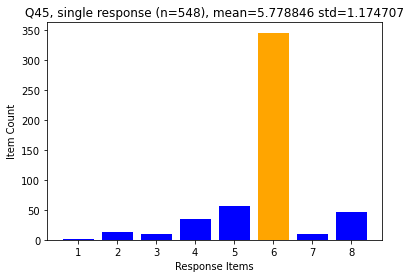

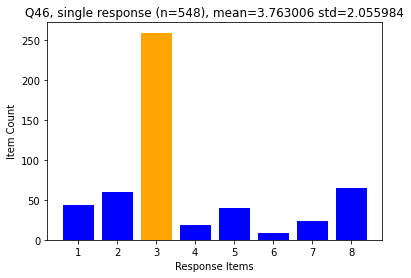

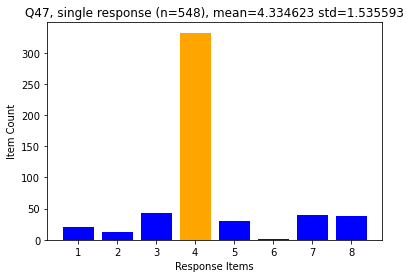

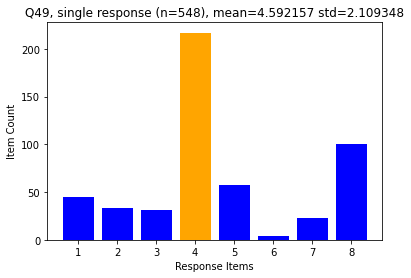

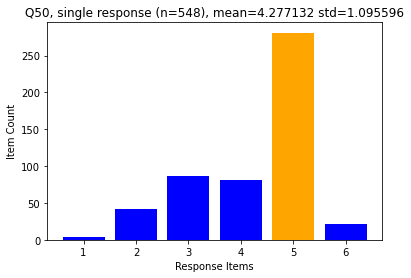

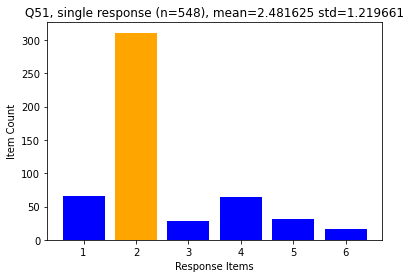

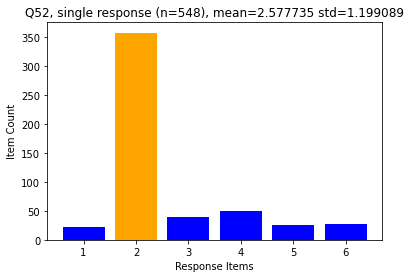

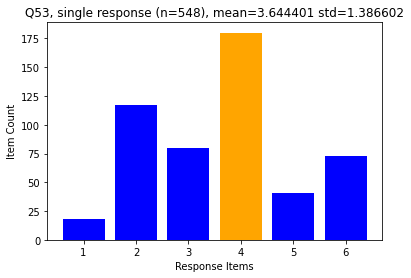

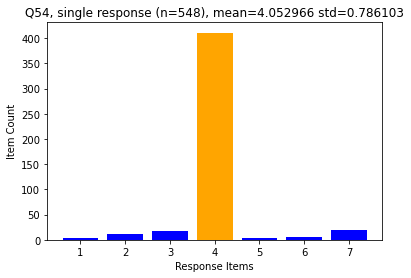

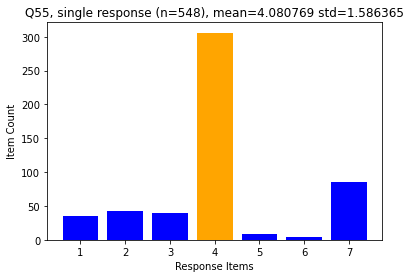

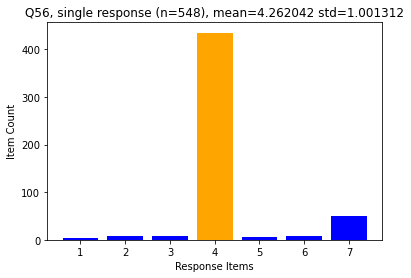

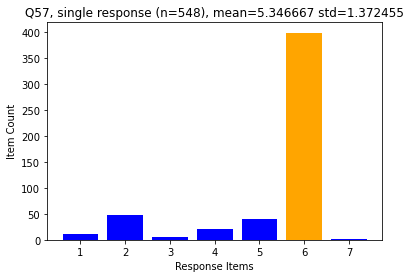

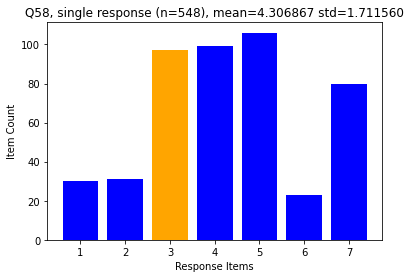

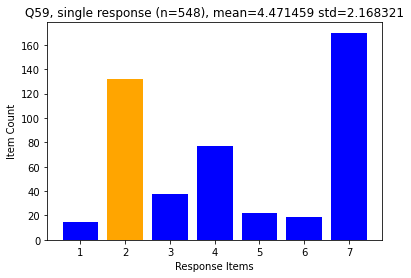

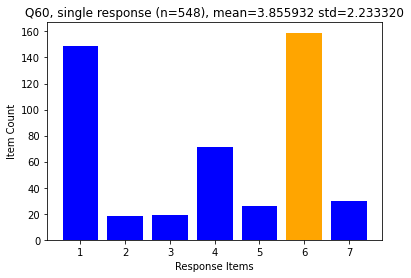

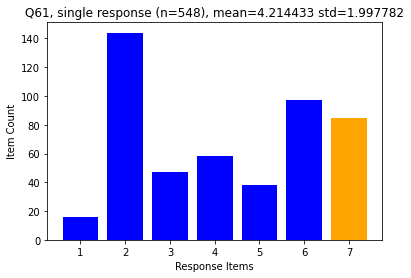

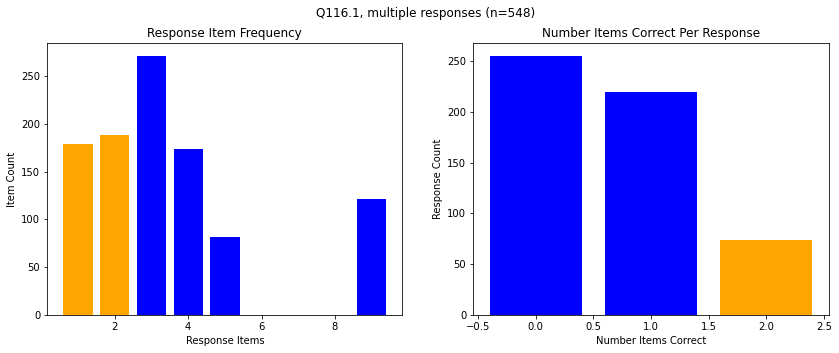

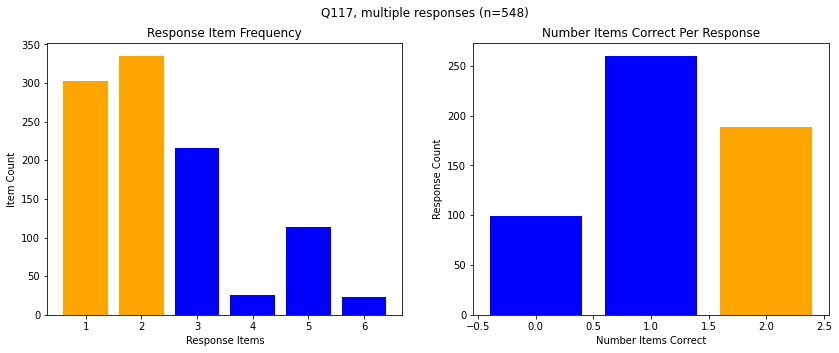

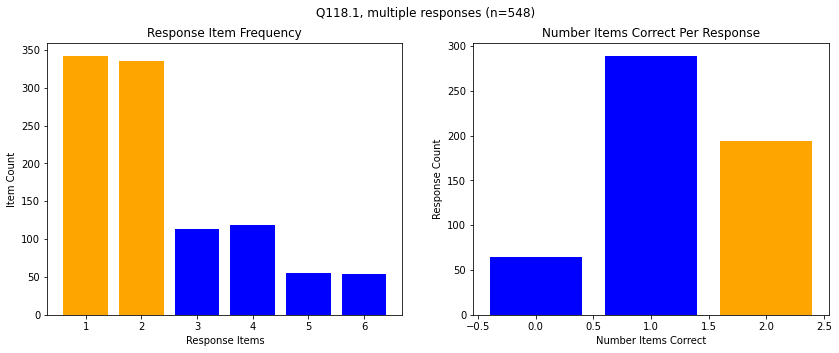

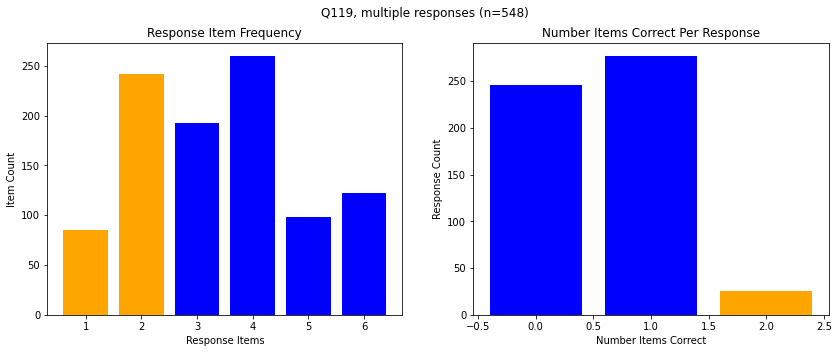

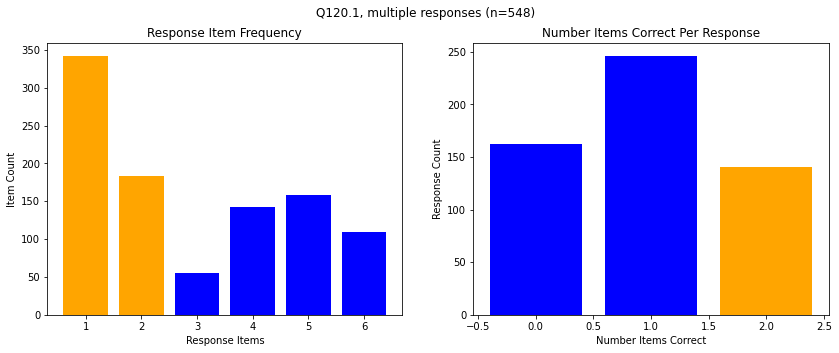

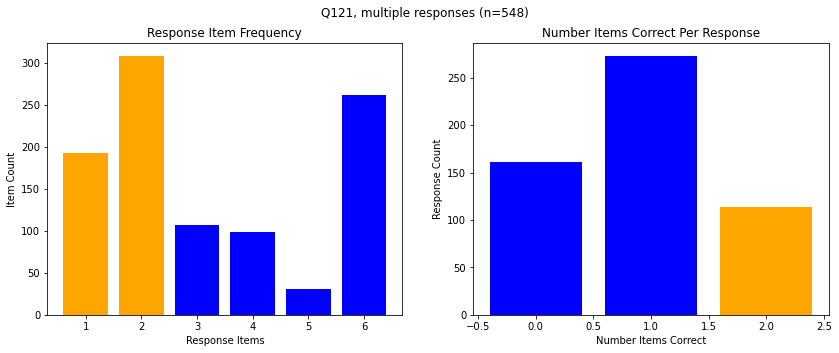

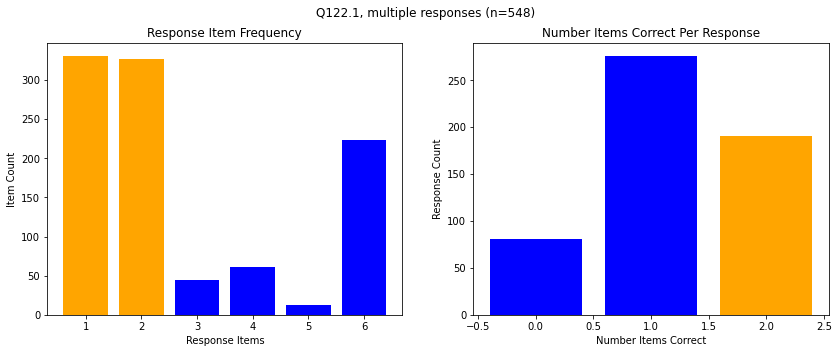

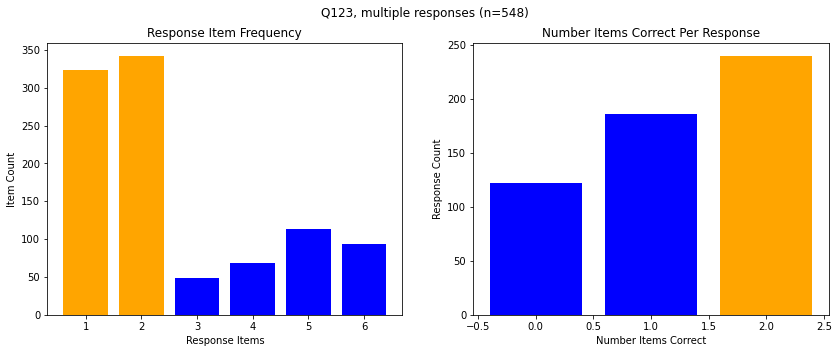

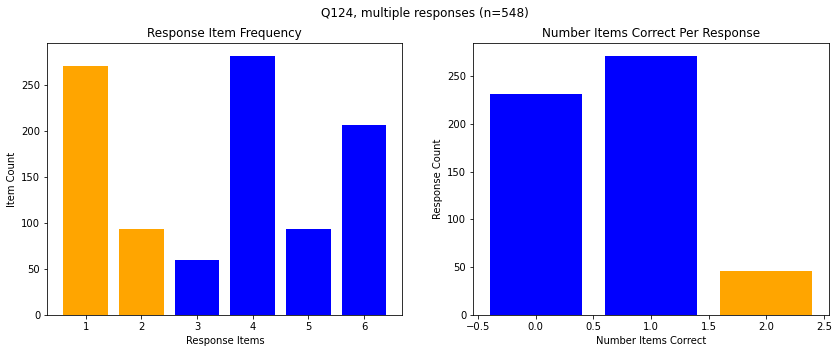

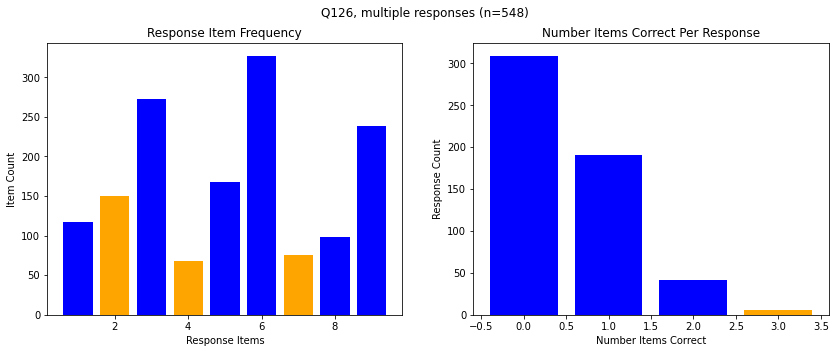

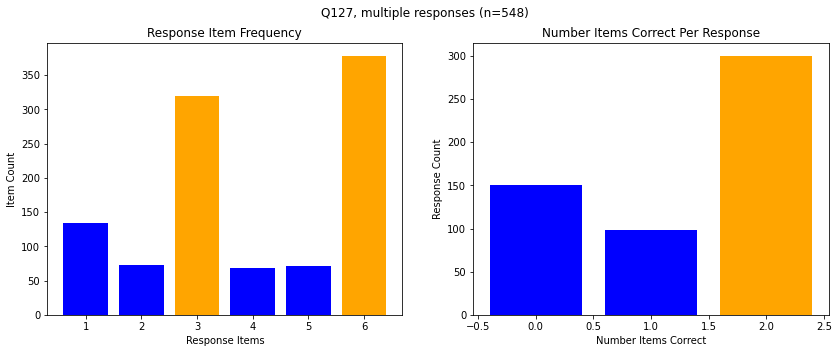

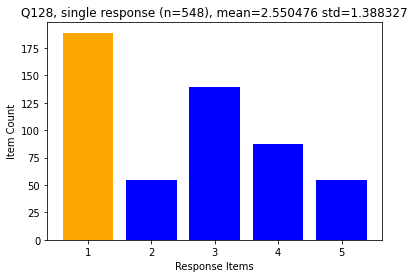

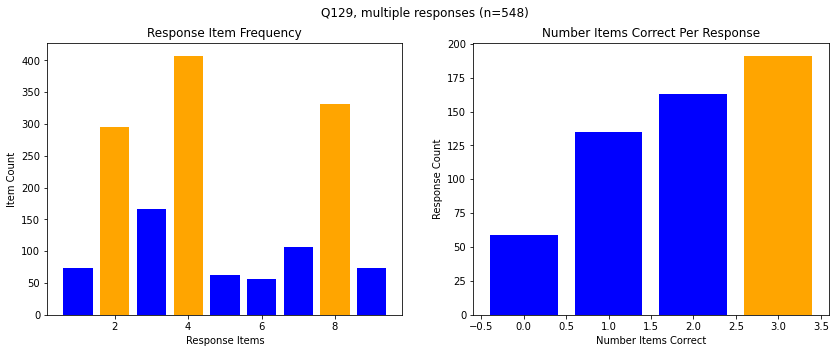

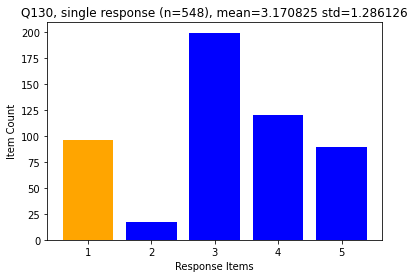

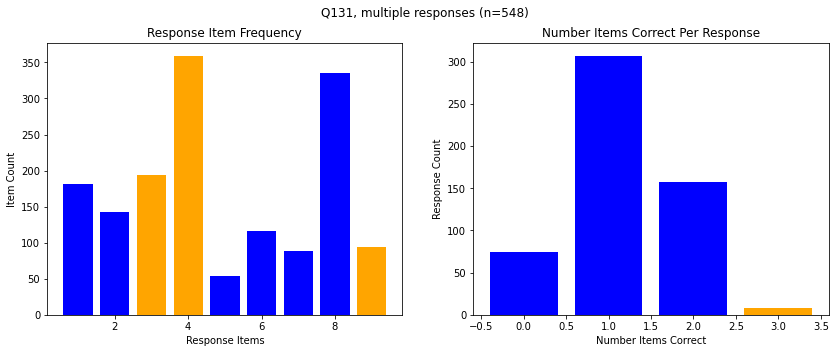

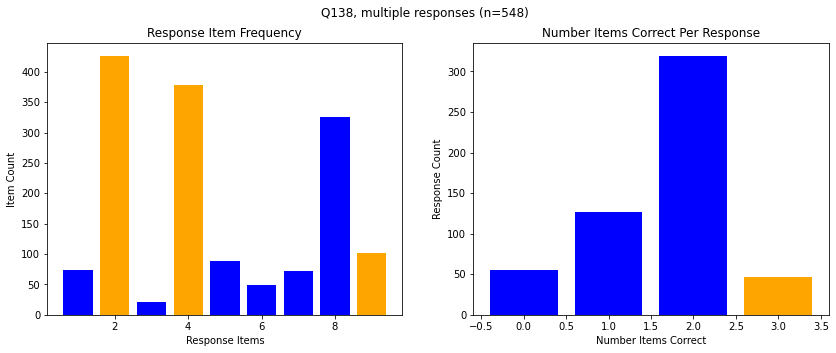

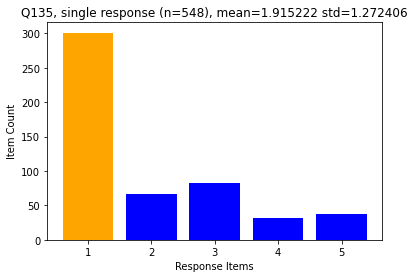

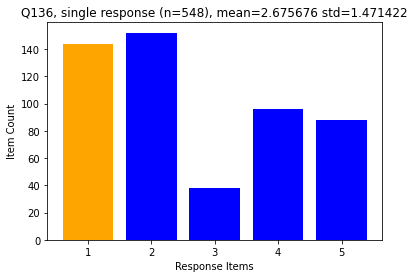

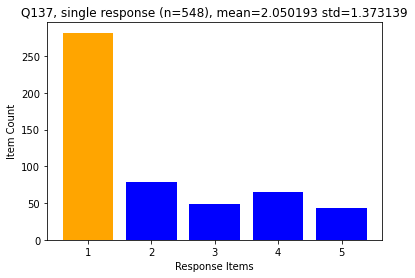

In [5]:
for question in list(correct_dict.keys()):
    question_responses = survey_df.loc[:,question]
    correct_responses = correct_dict[question]
    sample_response = question_responses[0]
    if isinstance(sample_response, str): # multi-item responses
        if len(correct_responses) == 1:
            print("Expected multiple correct reponses for question: %s. Aborting."%(question))
        else:
            question_responses = [np.array(str(x).split(',')).astype(float) for x in question_responses]
            response_vals, response_counts = np.unique([item for response in question_responses for item in response], return_counts=True)
            
            # Special handling for possible repeated NaN values
            nan_mask = np.isnan(response_vals)
            response_vals = response_vals[~nan_mask].tolist()+[np.nan]
            response_counts = response_counts[~nan_mask].tolist()+[np.sum(response_counts[nan_mask])]
            
            # Count the number of correct items per response
            #correct_items_vals = list(range(len(correct_responses)+1))
            correct_items_vals, correct_items_count = np.unique([np.sum([item in correct_responses for item in response]) for response in question_responses], return_counts=True)
            
            fig = plt.figure(figsize=(14,5))
            ax = fig.subplots(1,2)
            fig.suptitle(question+", multiple responses (n=%d)"%(len(question_responses)))
            
            items_bar_colors = len(response_vals)*['blue']
            for correct_response in correct_responses:
                items_bar_colors[response_vals.index(correct_response)] = 'orange'
            ax[0].bar(x=response_vals, height=response_counts, color=items_bar_colors)
            ax[0].set_title("Response Item Frequency")
            ax[0].set_xlabel("Response Items")
            ax[0].set_ylabel("Item Count")
            
            response_bar_colors = len(correct_items_vals)*['blue']
            response_bar_colors[-1] = 'orange'
            ax[1].bar(x=correct_items_vals, height=correct_items_count, color=response_bar_colors)
            ax[1].set_title("Number Items Correct Per Response")
            ax[1].set_xlabel("Number Items Correct")
            ax[1].set_ylabel("Response Count")
            
    else: # single-item responses
        if len(correct_responses) != 1:
            print("Expected single correct response for question: %s. Aborting."%(question))
        else:
            response_vals, response_counts = np.unique(question_responses.values, return_counts=True)
            
            # Special handling for possible repeated NaN values
            nan_mask = np.isnan(response_vals)
            response_vals = response_vals[~nan_mask].tolist()+[np.nan]
            response_counts = response_counts[~nan_mask].tolist()+[np.sum(response_counts[nan_mask])]
            
            bar_colors = len(response_vals)*['blue']
            bar_colors[response_vals.index(correct_responses[0])] = 'orange'
            fig, ax = plt.subplots()
            ax.bar(x=response_vals, height=response_counts, color=bar_colors)
            ax.set_title(question+", single response (n=%d), mean=%f std=%f"%(len(question_responses), np.nanmean(question_responses), np.nanstd(question_responses)))
            ax.set_xlabel("Response Items")
            ax.set_ylabel("Item Count")

In [6]:
# Score the questions and generate a score matrix
score_df = survey_df.copy(deep=True)
score_df = score_df.loc[:,correct_dict.keys()]
for question in list(correct_dict.keys()):
    question_responses = survey_df.loc[:,question]
    correct_responses = sorted(correct_dict[question])
    sample_response = question_responses[0]
    if isinstance(sample_response, str): # multi-item responses
        if len(correct_responses) == 1:
            print("Expected multiple correct reponses for question: %s. Aborting."%(question))
        else:
            question_responses = [sorted(str(x).split(',')) for x in question_responses.values]
            score_df.loc[:,question] = question_responses == correct_responses
            
    else: # single-item responses
        if len(correct_responses) != 1:
            print("Expected single correct response for question: %s. Aborting."%(question))
        else:            
            score_df.loc[:,question] = question_responses == correct_responses[0]

In [7]:
pd.set_option("max_rows", 10)
score_df

,Q45,Q46,Q47,Q49,Q50,Q51,Q52,Q53,Q54,Q55,...,Q126,Q127,Q128,Q129,Q130,Q131,Q138,Q135,Q136,Q137
0,True,False,True,True,True,False,True,True,True,True,...,False,False,True,False,False,False,False,True,True,True
1,False,False,False,False,False,False,True,True,True,False,...,False,False,True,False,True,False,False,False,False,False
2,True,True,True,False,False,False,True,False,True,True,...,False,False,False,False,False,False,False,True,False,True
3,True,True,True,False,False,True,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,True,False,True,True,True,True,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,False,False,False,False,True,True,True,False,True,True,...,False,False,False,False,False,False,False,True,False,True
544,True,True,True,True,True,True,True,False,True,True,...,False,False,True,False,True,False,False,True,True,True
545,True,False,True,True,True,False,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
546,False,False,True,True,True,False,True,False,True,True,...,False,False,True,False,False,False,False,True,False,True


In [8]:
# Bryce Li - 11/19/20
# GMA - Standard Scoring

def standard_scoring():
    point_counter = 0

    for index, series in survey_df.iterrows(): #used this to iterate through each row
        for question in list(correct_dict.keys()): #used this to gauge whether the answer choice was true or false
            if float(question[1:]) < 62: #testing for GMA questions
                x = []
                x.append(series[question])
                if x == correct_dict[question]: #if answer choice is right
                    point_counter = point_counter + 1
                else: #if answer choice is wrong
                    continue
                    
        standard_score.append(point_counter)
        point_counter = 0

In [9]:
# Bryce Li - 11/19/20
# GMA - Excluding Cube Questions

def no_cube():
    point_counter = 0

    for index, series in survey_df.iterrows(): #used this to iterate through each row
        for question in list(correct_dict.keys()): #used this to gauge whether the answer choice was true or false
            if float(question[1:]) < 62: #testing for GMA questions
                if question != 'Q58' and question != 'Q59' and question != 'Q60' and question != 'Q61':
                    x = []
                    x.append(series[question])
                    if x == correct_dict[question]: #if answer choice is right
                        point_counter = point_counter + 1
                    else: #if answer choice is wrong
                        continue
                        
        exclude_cube_score.append(point_counter)
        point_counter = 0

In [10]:
# Bryce Li - 11/19/20
# GMA - Including Cube Questions + Alternative Answers

def cube_alternatives():
    point_counter = 0
    
    for index, series in survey_df.iterrows(): #used this to iterate through each row)
        for question in list(correct_dict.keys()): #used this to gauge whether the answer choice was true or false
            if float(question[1:]) < 62: #testing for GMA questions
                x = []
                x.append(series[question])
                if x == correct_dict[question]: #if answer choice is right
                    point_counter = point_counter + 1

                else: #if answer choice is wrong
                    if question != 'Q58' and question != 'Q59' and question != 'Q60' and question != 'Q61': #if it's not the cube questions
                        continue
                    else: #if it is the cube questions
                        user_response = str(series.loc[question])
                        if question == 'Q58':
                            if user_response == "A" or "C" or "D" or "E" or "G":
                                point_counter = point_counter + 1
                        elif question == 'Q59':
                            if user_response == "A" or "B" or "D" or "G":
                                point_counter = point_counter + 1
                        elif question == 'Q60':
                            if user_response == "A" or "B" or "D" or "E" or "F" or "G":
                                point_counter = point_counter + 1
                        elif question == 'Q61':
                            if user_response == "A" or "B" or "C" or "E" or "F" or "G":
                                point_counter = point_counter + 1

        cube_alternatives_score.append(point_counter)
        point_counter = 0

In [11]:
# Bryce Li - 11/19/20
# Partial credit

def partial_credit_scorer(response, *correct_answers):
    if not pd.isnull(response):
        response_list = np.array(str(response).split(',')).astype(float).astype(int).tolist()
        partial_score = np.sum([x in correct_answers for x in response_list])
        return partial_score
    else:
        return 0

def compute_verbal_scores_partial_credit(survey_df):
    verbal_question_names = ["Q116.1","Q117","Q118.1","Q119","Q120.1","Q121","Q122.1","Q123","Q124","Q126","Q127","Q128","Q129","Q130","Q131","Q138","Q135","Q136","Q137"]
    verbal_survey_df = survey_df[['ID']+verbal_question_names]
    verbal_survey_df.loc[:,'verbal_partial_credit_score'] = np.zeros(verbal_survey_df.shape[0])
    for verbal_question_name in verbal_question_names:
        correct_answers = correct_dict[verbal_question_name]
        verbal_response_col = verbal_survey_df[verbal_question_name]
        verbal_survey_df.loc[:,'verbal_partial_credit_score'] += verbal_response_col.apply(partial_credit_scorer, args=(correct_answers)).values
    return verbal_survey_df

In [12]:
# Bryce Li - 11/19/20
# Verbal - Nonpartial credit

def compute_verbal_scores_nonpartial_credit(survey_df):
    verbal_question_names = ["Q116.1","Q117","Q118.1","Q119","Q120.1","Q121","Q122.1","Q123","Q124","Q126","Q127","Q128","Q129","Q130","Q131","Q138","Q135","Q136","Q137"]
    verbal_survey_df = survey_df[['ID']+verbal_question_names]
    verbal_survey_df.loc[:,'verbal_nonpartial_credit_score'] = np.zeros(verbal_survey_df.shape[0])
    for verbal_question_name in verbal_question_names:
        correct_answers = correct_dict[verbal_question_name]
        verbal_response_col = verbal_survey_df[verbal_question_name]
        verbal_survey_df.loc[:,'verbal_nonpartial_credit_score'] += verbal_response_col.apply(lambda value: 1 if not pd.isnull(value) and sorted(np.array(str(value).split(',')).astype(float).astype(int)) == sorted(correct_answers) else 0).values
    return verbal_survey_df

In [13]:
# Bryce Li - 11/19/20
# Prints out each set of score results attached to survey_df

verbal_survey_partial_df = compute_verbal_scores_partial_credit(survey_df)
is_verbal_mismatched = np.nansum(survey_df['Verbal']-verbal_survey_partial_df['verbal_partial_credit_score']) > 0
print("Verbal standard scores mismatched? " + str(is_verbal_mismatched))

verbal_survey_nonpartial_df = compute_verbal_scores_nonpartial_credit(survey_df)

standard_score = []
standard_scoring()

exclude_cube_score = []
no_cube()

cube_alternatives_score = []
cube_alternatives()

standard_score_dict = {'standard_score_gma':[]
        }

exclude_cube_dict = {'gma_wo_cube_questions':[]
        }

cube_alternatives_dict = {'gma_w_alternatives':[]
        }

for score in standard_score:
    standard_score_dict['standard_score_gma'].append(float(score))
    
standard_score_dict_df = pd.DataFrame(standard_score_dict)
is_gma_standard_mismatched = np.nansum(survey_df['GMA']-standard_score_dict_df) > 0
print("GMA standard scores mismatched? " + str(is_gma_standard_mismatched))

for score in exclude_cube_score:
    exclude_cube_dict['gma_wo_cube_questions'].append(float(score))

exclude_cube_dict_df = pd.DataFrame(exclude_cube_dict)

for score in cube_alternatives_score:
    cube_alternatives_dict['gma_w_alternatives'].append(float(score))
    
cube_alternatives_dict_df = pd.DataFrame(cube_alternatives_dict)

output_df = pd.concat((survey_df, standard_score_dict_df, exclude_cube_dict_df, cube_alternatives_dict_df, verbal_survey_partial_df['verbal_partial_credit_score'], verbal_survey_nonpartial_df['verbal_nonpartial_credit_score']), axis=1)
output_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Verbal standard scores mismatched? True
GMA standard scores mismatched? False


,Unnamed: 0,ID,obsExtra,obsAgree,obsConsc,obsES,obsOpen,obsIntel,obsHire,obsQ1,...,Q131,Q138,Q135,Q136,Q137,standard_score_gma,gma_wo_cube_questions,gma_w_alternatives,verbal_partial_credit_score,verbal_nonpartial_credit_score
0,1,an20te,3.833333,6.166667,5.000000,6.166667,5.500,6.000,4.333333,7.00,...,"1,6,7","2,4,8",1.0,1.0,1.0,14.0,10.0,14.0,20.0,7.0
1,2,an05ma,6.250000,5.000000,5.625000,3.500000,5.125,5.625,4.375000,5.00,...,"2,5,9","1,4,9",3.0,4.0,3.0,4.0,4.0,8.0,17.0,4.0
2,3,ey23el,1.500000,5.625000,5.000000,4.250000,4.125,5.125,3.125000,6.00,...,"2,5,9","1,4,8",1.0,5.0,1.0,8.0,8.0,12.0,17.0,5.0
3,4,an19ra,3.375000,5.000000,3.000000,5.125000,4.625,4.125,2.750000,6.75,...,"2,3,5","3,5,9",5.0,4.0,3.0,7.0,7.0,11.0,13.0,2.0
4,5,an14em,3.625000,5.125000,6.500000,3.625000,5.500,6.000,4.375000,6.25,...,"3,4,8","2,5,8",1.0,2.0,1.0,11.0,8.0,12.0,20.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,544,za12le,3.750000,5.000000,5.750000,5.000000,5.000,5.000,4.000000,6.00,...,"2,4,8","2,4,8",1.0,2.0,1.0,7.0,7.0,11.0,20.0,6.0
544,545,er19su,3.000000,6.000000,5.500000,5.500000,3.500,4.000,4.000000,4.00,...,"1,4,8","2,4,8",1.0,1.0,1.0,12.0,10.0,14.0,27.0,13.0
545,546,ry24re,4.125000,5.125000,4.875000,4.250000,4.375,5.875,3.875000,5.25,...,"1,6,8","3,4,8",5.0,5.0,4.0,13.0,10.0,14.0,18.0,5.0
546,547,in23ta,5.500000,4.500000,6.000000,5.750000,5.000,6.000,4.625000,5.00,...,"2,4,8","2,4,8",1.0,2.0,1.0,10.0,8.0,12.0,19.0,5.0


In [14]:
# Bryce Li - 11/19/20
# Outputs excel file to SRC folder

output_df.to_csv("OUTPUT.csv")

In [15]:
for question in list(expected_stats.keys()):
    scored_responses = score_df[question]
    scored_mean = np.mean(scored_responses)
    scored_std = np.std(scored_responses)
    print("Question %s"%(question))
    question_stats_df = pd.DataFrame(data=np.array([[scored_mean, scored_std],[expected_stats[question]['mean'], expected_stats[question]['std']]]), columns=['Mean', 'Std'], index=['Measured', 'Expected'])
    print(question_stats_df)
    print("\n")

Question Q58
              Mean       Std
Measured  0.177007  0.381675
Expected  0.180000  0.380000


Question Q59
              Mean       Std
Measured  0.240876  0.427615
Expected  0.230000  0.420000


Question Q60
              Mean      Std
Measured  0.290146  0.45383
Expected  0.310000  0.46000


Question Q61
              Mean       Std
Measured  0.155109  0.362009
Expected  0.180000  0.380000




# Test internal reliability

In [16]:
def CronbachsAlphaCorr(df):
    # cols are items, rows are observations
    itemscores = np.asarray(df)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]

    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [17]:
r3d_questions = ['Q58', 'Q59', 'Q60', 'Q61']
scored_r3d_responses_df = score_df.loc[:,r3d_questions]
alpha = CronbachsAlphaCorr(scored_r3d_responses_df)
print("Cronbach's Alpha for R3D: %f"%(alpha))

Cronbach's Alpha for R3D: 0.581419


# Factor Analysis

In [18]:
# Bartlett test for sphericity (uncorrelated variables)
chi_square_value, p_value = calculate_bartlett_sphericity(scored_r3d_responses_df.values)
chi_square_value, p_value

(184.4209667204213, 1.90983790587618e-37)

In [19]:
# KMO test for suitability of factor analysis.  KMO < 0.6 is "inadequate"
kmo_all, kmo_model = calculate_kmo(scored_r3d_responses_df.values)
kmo_model

0.6930028122829273

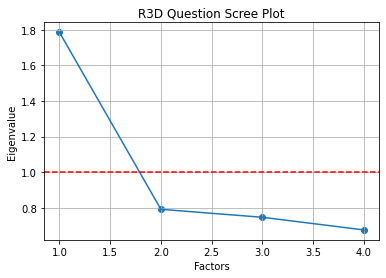

In [20]:
# Scree plot
fa = factor_analyzer.FactorAnalyzer(5, rotation="varimax")
fa.fit(scored_r3d_responses_df)
eigen_vecs, eigen_vals = fa.get_eigenvalues()
plt.scatter(range(1,scored_r3d_responses_df.shape[1]+1), eigen_vecs)
plt.plot(range(1,scored_r3d_responses_df.shape[1]+1), eigen_vecs)
plt.title('R3D Question Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

In [21]:
fa = factor_analyzer.FactorAnalyzer(1, rotation=None)
fa.fit(scored_r3d_responses_df)
loading_mat = fa.loadings_
factor_variance, prop_factor_variance, cum_factor_variance = fa.get_factor_variance()
loading_mat, cum_factor_variance

(array([[-0.50631247],
        [-0.59178271],
        [-0.43888681],
        [-0.51156208]]),
 array([0.26521912]))